## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import PercentFormatter
import pandas as pd
import scipy.stats as st
from IPython.display import display, HTML
import seaborn as sns

redbook_data_path = "Data/Redbook_data.csv"

In [18]:
# Read the redbook data
redbook_data = pd.read_csv(redbook_data_path, encoding='iso-8859-1', low_memory=False)
# redbook_data.head()
# redbook_data.info()

In [3]:
# Cleanup RedbookData - Removal of blank retail price columns
redbook_data_Pricing = redbook_data.loc[(redbook_data["Retail_price_when_new"] != ' -   ') & 
                                         (redbook_data["2021_sale_price_retail_high"] != ' -   ') &
                                         (redbook_data["2021_sale_price_retail_low"] != ' -   ') &
                                         (redbook_data["2021_sale_price_wholesale_high"] != ' -   ') &
                                         (redbook_data["2021_sale_price_wholesale_low"] != ' -   ')]
#Sort Value by retails price
redbook_data_Pricing = redbook_data_Pricing.sort_values("Retail_price_when_new")

# Removal of string characters in all pricing and change format of all price columns to Float to enable calculations
redbook_data_Pricing["Retail_price_when_new"] = redbook_data_Pricing["Retail_price_when_new"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_retail_high"] = redbook_data_Pricing["2021_sale_price_retail_high"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_retail_low"] = redbook_data_Pricing["2021_sale_price_retail_low"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_wholesale_high"] = redbook_data_Pricing["2021_sale_price_wholesale_high"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_wholesale_low"] = redbook_data_Pricing["2021_sale_price_wholesale_low"].str.replace(r'\D', '').astype(float)
# redbook_data_Pricing.head()

<ipython-input-3-ce4750c5faf9>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  redbook_data_Pricing["Retail_price_when_new"] = redbook_data_Pricing["Retail_price_when_new"].str.replace(r'\D', '').astype(float)
<ipython-input-3-ce4750c5faf9>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  redbook_data_Pricing["2021_sale_price_retail_high"] = redbook_data_Pricing["2021_sale_price_retail_high"].str.replace(r'\D', '').astype(float)
<ipython-input-3-ce4750c5faf9>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  redbook_data_Pricing["2021_sale_price_retail_low"] = redbook_data_Pricing["2021_sale_price_retail_low"].str.replace(r'\D', '').astype(float)
<ipython-input-3-ce4750c5faf9>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  redbook_data_Pricing["2021_sale_price_wholesale_high"] = redb

In [4]:
# Make a list of top 5 brands and body_types based on QLD Sales data
brands = ("TOYOTA","HOLDEN","FORD","MITSUBISHI","MAZDA")
body_types = ("WAGON","SEDAN","HATCHBACK","CAB CHASSIS","UTILITY")
years = (2012, 2013, 2014, 2015, 2016, 2017,2018, 2019, 2020)

# filter car manufacturing data for above
Top_five_makes = redbook_data_Pricing.loc[redbook_data_Pricing["Brand"].isin(brands) & redbook_data_Pricing["Body_type"].isin(body_types) & redbook_data_Pricing["Manufacture_year"].isin(years)]

# Create average variables
Top_five_makes['2021_sale_price_wholesale_average']= (Top_five_makes['2021_sale_price_wholesale_high'] + Top_five_makes['2021_sale_price_wholesale_low'])/2
Top_five_makes['Fuel_efficiency_avg_(L/100km)']= (Top_five_makes['Fuel_efficiency_high_(L/100km)'] + Top_five_makes['Fuel_efficiency_low_(L/100km)'])/2
Top_five_makes['Depreciation']= 1-((Top_five_makes['2021_sale_price_wholesale_high'] + Top_five_makes['2021_sale_price_wholesale_low'])/2)/(Top_five_makes['Retail_price_when_new'])

# Top_five_makes.head()

<ipython-input-4-1cb90e40781d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_five_makes['2021_sale_price_wholesale_average']= (Top_five_makes['2021_sale_price_wholesale_high'] + Top_five_makes['2021_sale_price_wholesale_low'])/2
<ipython-input-4-1cb90e40781d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_five_makes['Fuel_efficiency_avg_(L/100km)']= (Top_five_makes['Fuel_efficiency_high_(L/100km)'] + Top_five_makes['Fuel_efficiency_low_(L/100km)'])/2
<ipython-input-4-1cb90e40781d>:12: Setting

In [208]:
# Look at what data we have
# Top_five_makes.info()

In [10]:
# create data for deprecation grouped by body type
def linegrph(body):
    filtered_data= Top_five_makes[(Top_five_makes.Body_type == body)]

    depreciation = filtered_data.groupby([  'Brand', 
                                            'Manufacture_year'], 
                                as_index=False).agg({'Depreciation': 'mean'
                                                    })
    depreciation.sort_values(['Brand','Manufacture_year'], ascending=True, inplace=True)
    print(depreciation)
    
    df_wide = depreciation.pivot_table(index='Manufacture_year', columns='Brand', values='Depreciation')

    # plot line graph
    plt.figure(figsize=(10, 6))
    p = sns.lineplot(data=df_wide, linewidth = 5)
    p.set_ylabel("Depreciation(%)", fontsize = 12, weight='bold')
    p.set_xlabel("Manufacturing Year", fontsize = 12, weight='bold')
    p.tick_params(labelsize=13)
 
    plt.title(f"Depreciation Rate Over Time ({(body)}) ", fontsize = 12, weight='bold')
    plt.grid()
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()


         Brand  Manufacture_year  Depreciation
0         FORD              2012      0.780857
1         FORD              2013      0.717657
2         FORD              2014      0.647642
3         FORD              2015      0.561328
4         FORD              2016      0.497507
5         FORD              2017      0.392304
6         FORD              2018      0.303982
7         FORD              2019      0.225752
8         FORD              2020      0.159834
9       HOLDEN              2012      0.738304
10      HOLDEN              2013      0.692032
11      HOLDEN              2014      0.601751
12      HOLDEN              2015      0.519053
13      HOLDEN              2016      0.463960
14      HOLDEN              2017      0.415724
15      HOLDEN              2018      0.363035
16      HOLDEN              2019      0.295692
17      HOLDEN              2020      0.241363
18       MAZDA              2012      0.683882
19       MAZDA              2013      0.599283
20       MAZD

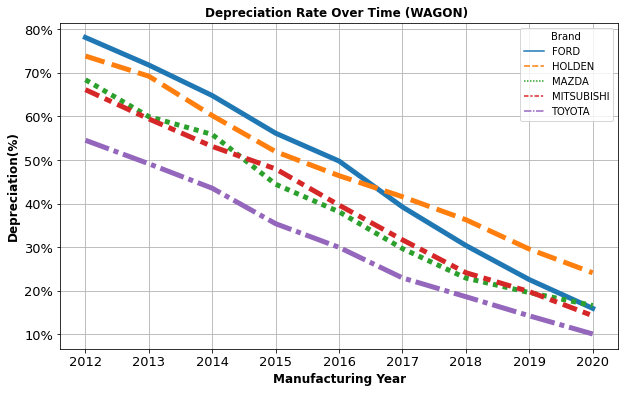

In [11]:
# Depreciation by body type #1
linegrph(body= "WAGON")

         Brand  Manufacture_year  Depreciation
0         FORD              2012      0.733244
1         FORD              2013      0.701924
2         FORD              2014      0.574677
3         FORD              2015      0.449464
4         FORD              2016      0.315661
5         FORD              2017      0.371422
6         FORD              2018      0.304375
7       HOLDEN              2012      0.757156
8       HOLDEN              2013      0.674261
9       HOLDEN              2014      0.543879
10      HOLDEN              2015      0.470196
11      HOLDEN              2016      0.369144
12      HOLDEN              2017      0.244282
13      HOLDEN              2018      0.430366
14       MAZDA              2012      0.634528
15       MAZDA              2013      0.554871
16       MAZDA              2014      0.552405
17       MAZDA              2015      0.431842
18       MAZDA              2016      0.358876
19       MAZDA              2017      0.291957
20       MAZD

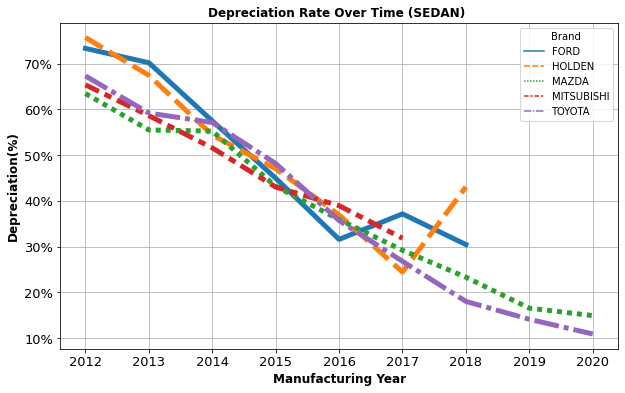

In [12]:
# Depreciation by body type #2
linegrph(body= "SEDAN")

         Brand  Manufacture_year  Depreciation
0         FORD              2012      0.764555
1         FORD              2013      0.690036
2         FORD              2014      0.638562
3         FORD              2015      0.560239
4         FORD              2016      0.479729
5         FORD              2017      0.421295
6         FORD              2018      0.335662
7         FORD              2019      0.254496
8         FORD              2020      0.157270
9       HOLDEN              2012      0.770332
10      HOLDEN              2013      0.702535
11      HOLDEN              2014      0.611983
12      HOLDEN              2015      0.550471
13      HOLDEN              2016      0.478269
14      HOLDEN              2017      0.408464
15      HOLDEN              2018      0.344107
16      HOLDEN              2019      0.281969
17      HOLDEN              2020      0.241726
18       MAZDA              2012      0.617938
19       MAZDA              2013      0.531808
20       MAZD

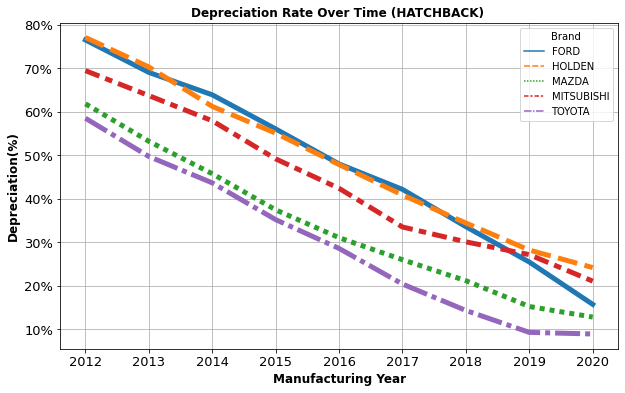

In [13]:
# Depreciation by body type #3
linegrph(body= "HATCHBACK")

         Brand  Manufacture_year  Depreciation
0         FORD              2012      0.596542
1         FORD              2013      0.553171
2         FORD              2014      0.450817
3         FORD              2015      0.355108
4         FORD              2016      0.295498
5         FORD              2017      0.246972
6         FORD              2018      0.201891
7         FORD              2019      0.134764
8         FORD              2020      0.104470
9       HOLDEN              2012      0.585892
10      HOLDEN              2013      0.534266
11      HOLDEN              2014      0.434509
12      HOLDEN              2015      0.363350
13      HOLDEN              2016      0.293445
14      HOLDEN              2017      0.242636
15      HOLDEN              2018      0.230733
16      HOLDEN              2019      0.180803
17      HOLDEN              2020      0.169695
18       MAZDA              2012      0.542932
19       MAZDA              2013      0.505465
20       MAZD

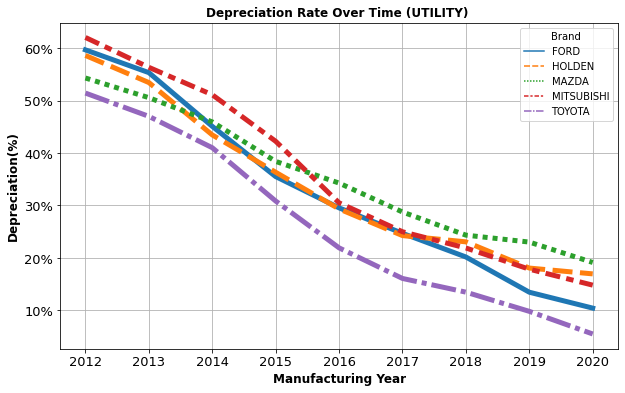

In [14]:
# Depreciation by body type #4
linegrph(body= "UTILITY")

         Brand  Manufacture_year  Depreciation
0         FORD              2012      0.605888
1         FORD              2013      0.561734
2         FORD              2014      0.462253
3         FORD              2015      0.364675
4         FORD              2016      0.307334
5         FORD              2017      0.249365
6         FORD              2018      0.208762
7         FORD              2019      0.145696
8         FORD              2020      0.125813
9       HOLDEN              2012      0.639354
10      HOLDEN              2013      0.598327
11      HOLDEN              2014      0.523522
12      HOLDEN              2015      0.454783
13      HOLDEN              2016      0.344362
14      HOLDEN              2017      0.279890
15      HOLDEN              2018      0.232499
16      HOLDEN              2019      0.184809
17      HOLDEN              2020      0.176836
18       MAZDA              2012      0.553331
19       MAZDA              2013      0.519524
20       MAZD

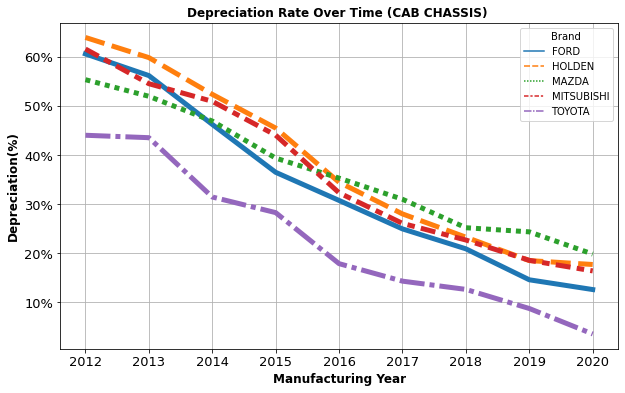

In [15]:
# Depreciation by body type #5
linegrph(body= "CAB CHASSIS")

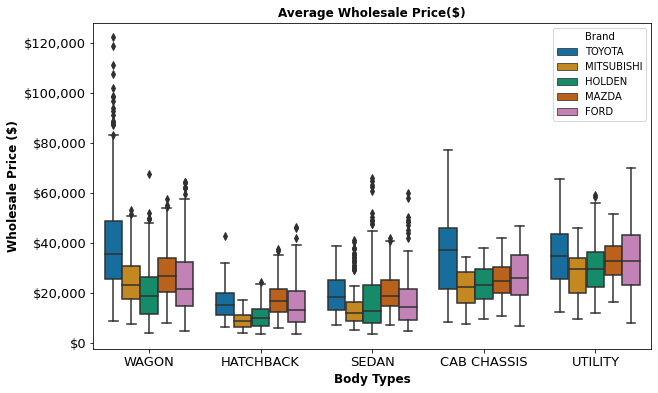

In [17]:
# Price guide plot
plt.figure(figsize=(10, 6))

fg = sns.boxplot(y='2021_sale_price_wholesale_average', x='Body_type', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Brand')
fg.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
fg.set_title('Average Wholesale Price($)', fontsize = 12, weight='bold')
fg.set_ylabel('Wholesale Price ($)', fontsize = 12, weight='bold')
fg.set_xlabel('Body Types', fontsize = 12, weight='bold')
fg.tick_params(labelsize=13)

In [ ]:
# END
# 
# 
# ADDITIONAL PLOTS AND ANALYSIS BELOW IF NEEDED

In [16]:
# look at summary stats on wholesale average

summary_stats_info = Top_five_makes.groupby(['Brand','Body_type'], 
                            as_index=False).agg(['min','max','mean','median'])["2021_sale_price_wholesale_average"]
summary_stats_info      

min       max          mean   median
Brand      Body_type                                            
FORD       CAB CHASSIS   6825.0   46700.0  26920.383523  25987.5
           HATCHBACK     3650.0   46225.0  15116.639871  13075.0
           SEDAN         4750.0   60100.0  16917.927632  14150.0
           UTILITY       7975.0   70000.0  33103.822314  32787.5
           WAGON         4800.0   64275.0  25295.383693  21675.0
HOLDEN     CAB CHASSIS   9350.0   37950.0  23420.402299  23100.0
           HATCHBACK     3600.0   24450.0  10633.301527   9775.0
           SEDAN         3550.0   66000.0  17084.816384  12850.0
           UTILITY      11750.0   58975.0  29640.569620  29375.0
           WAGON         4125.0   67575.0  20221.050000  18600.0
MAZDA      CAB CHASSIS  10900.0   41800.0  25273.511905  24887.5
           HATCHBACK     6000.0   37500.0  17320.344828  16675.0
           SEDAN         7175.0   41925.0  20371.000000  18875.0
           UTILITY      16175.0   51500.0  33091.540404  32912.5
           WAGON         8125.0   57550.0  27726.684953  26725.0
MITSUBISHI CAB CHASSIS   7375.0   34200.0  21848.125000  22237.5
           HATCHBACK     3900.0   17150.0   9060.491071   8675.0
           SEDAN         5325.0   41025.0  15303.066038  12062.5
           UTILITY       9575.0   45850.0  27774.157303  29350.0
           WAGON         7475.0   53125.0  24710.776699  23325.0
TOYOTA     CAB CHASSIS   8300.0   76900.0  36502.659574  37175.0
           HATCHBACK     6425.0   42625.0  15845.701357  14975.0
           SEDAN         7225.0   38825.0  19671.220930  18225.0
           UTILITY      12300.0   65600.0  34840.774908  34850.0
           WAGON         8650.0  122075.0  38768.675497  35525.0

In [317]:
# look at summary stats on depreciation average

summary_stats_info = Top_five_makes.groupby(['Brand','Body_type'], 
                            as_index=False).agg(['min','max','mean','median'])["Depreciation"]
summary_stats_info      

min       max      mean    median
Brand      Body_type                                          
FORD       CAB CHASSIS  0.104238  0.712930  0.342292  0.307698
           HATCHBACK    0.127881  0.856304  0.510517  0.519546
           SEDAN       -0.001834  0.818048  0.569536  0.621276
           UTILITY      0.048050  0.716577  0.324278  0.296118
           WAGON        0.104193  0.856029  0.427751  0.408299
HOLDEN     CAB CHASSIS  0.169402  0.653575  0.385865  0.370370
           HATCHBACK    0.222831  0.824337  0.545603  0.544886
           SEDAN       -0.130660  0.844792  0.572367  0.625856
           UTILITY     -0.038293  0.668921  0.350762  0.308022
           WAGON       -0.141662  0.852626  0.506471  0.500526
MAZDA      CAB CHASSIS  0.191835  0.573719  0.325754  0.299895
           HATCHBACK    0.098341  0.717986  0.327797  0.287777
           SEDAN        0.098341  0.715247  0.338761  0.286746
           UTILITY      0.185771  0.552806  0.320613  0.284672
           WAGON        0.083770  0.760959  0.317458  0.248388
MITSUBISHI CAB CHASSIS  0.139985  0.648642  0.310901  0.258579
           HATCHBACK    0.179531  0.780225  0.512525  0.568649
           SEDAN        0.236034  0.754495  0.520980  0.523608
           UTILITY      0.131464  0.636435  0.334708  0.255046
           WAGON        0.067173  0.745228  0.389715  0.359795
TOYOTA     CAB CHASSIS -0.041697  0.562928  0.210025  0.156605
           HATCHBACK   -0.024482  0.653406  0.319314  0.314003
           SEDAN        0.078082  0.761579  0.382558  0.368462
           UTILITY      0.042361  0.535674  0.241595  0.160054
           WAGON        0.006172  0.711374  0.320222  0.301265

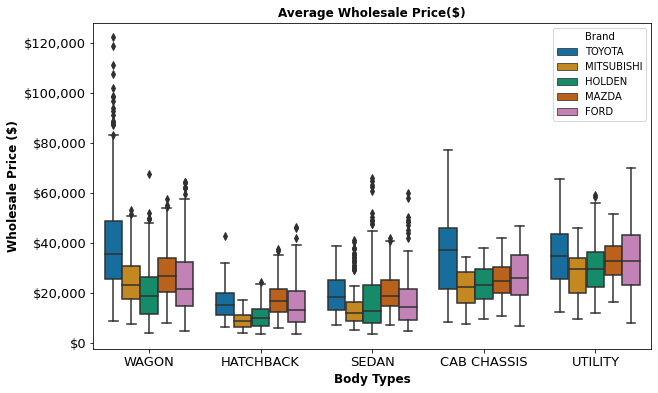

In [322]:
plt.figure(figsize=(10, 6))

fg = sns.boxplot(y='2021_sale_price_wholesale_average', x='Body_type', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Brand')
fg.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
fg.set_title('Average Wholesale Price($)', fontsize = 12, weight='bold')
fg.set_ylabel('Wholesale Price ($)', fontsize = 12, weight='bold')
fg.set_xlabel('Body Types', fontsize = 12, weight='bold')
fg.tick_params(labelsize=13)


<AxesSubplot:xlabel='Body_type', ylabel='2021_sale_price_wholesale_average'>

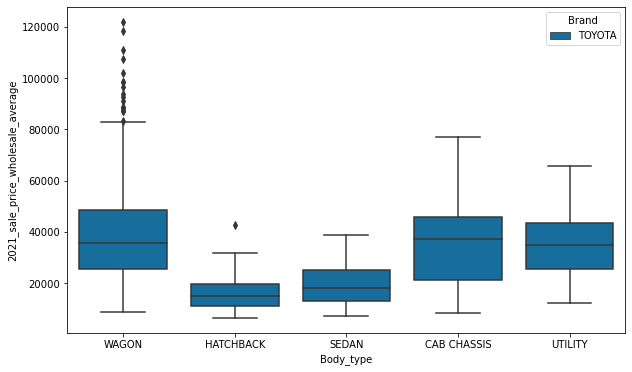

In [207]:
filtered_data= Top_five_makes[(Top_five_makes.Brand == "TOYOTA")]

plt.figure(figsize=(10, 6))
sns.boxplot(y='2021_sale_price_wholesale_average', x='Body_type', 
                 data=filtered_data, 
                 palette="colorblind",
                 hue='Brand')


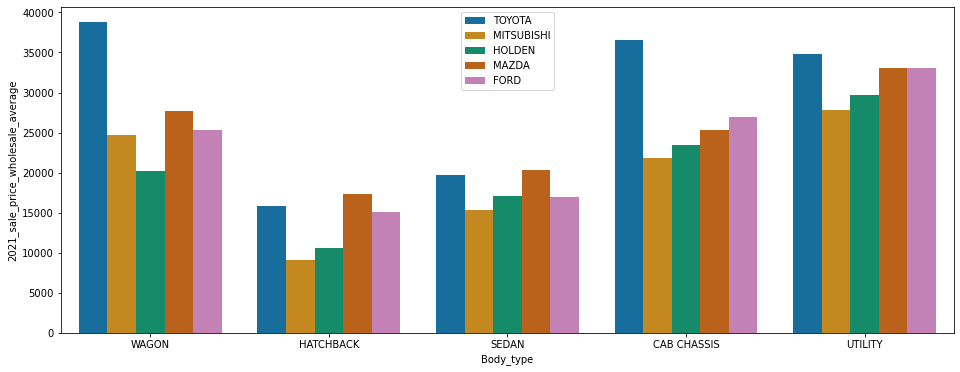

In [38]:
plt.figure(figsize=(16, 6))
sns.barplot(y='2021_sale_price_wholesale_average', x='Body_type', ci=None, 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Brand')

plt.legend(loc='upper center')

                #  confidence level or std

<AxesSubplot:xlabel='Brand', ylabel='Depreciation'>

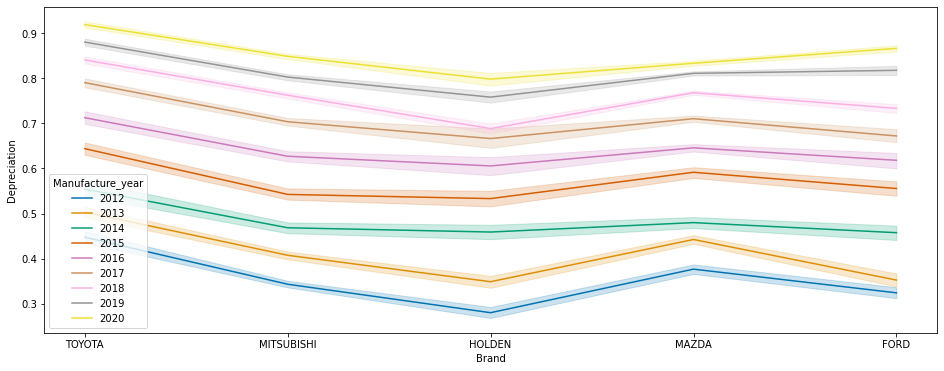

In [74]:
filtered_data= Top_five_makes[(Top_five_makes.Body_type == body)]

<AxesSubplot:xlabel='Brand', ylabel='Fuel_efficiency_avg_(L/100km)'>

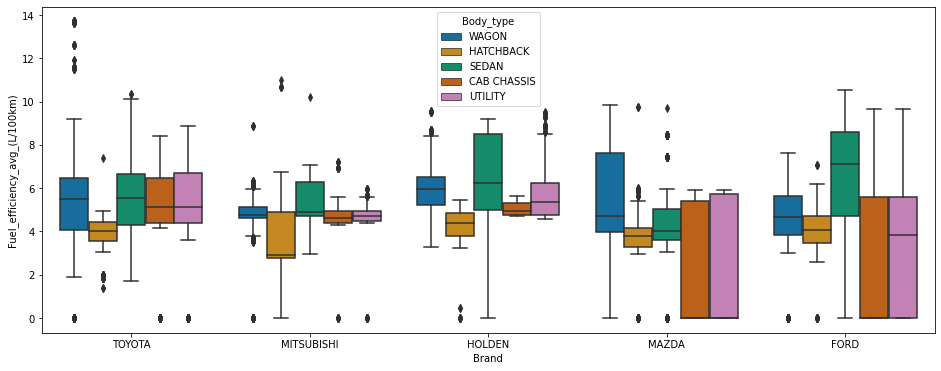

In [12]:
plt.figure(figsize=(16, 6))
sns.boxplot(y='Fuel_efficiency_avg_(L/100km)', x='Brand', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Body_type')

<AxesSubplot:xlabel='Brand', ylabel='Fuel_efficiency_avg_(L/100km)'>

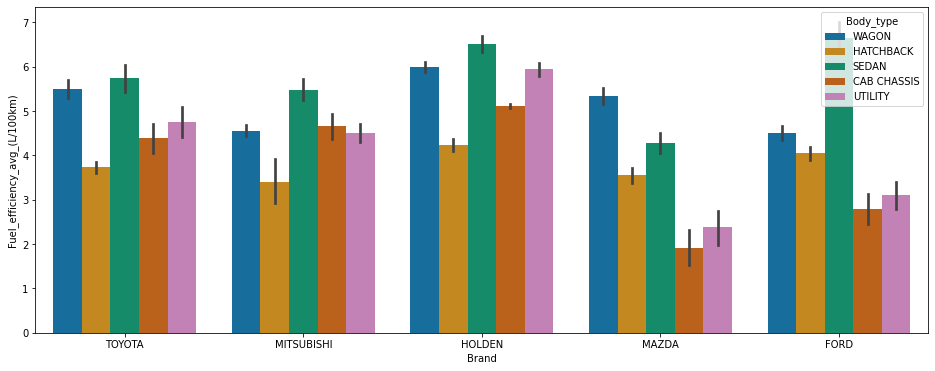

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(y='Fuel_efficiency_avg_(L/100km)', x='Brand', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Body_type')

<AxesSubplot:xlabel='Brand', ylabel='Fuel_efficiency_avg_(L/100km)'>

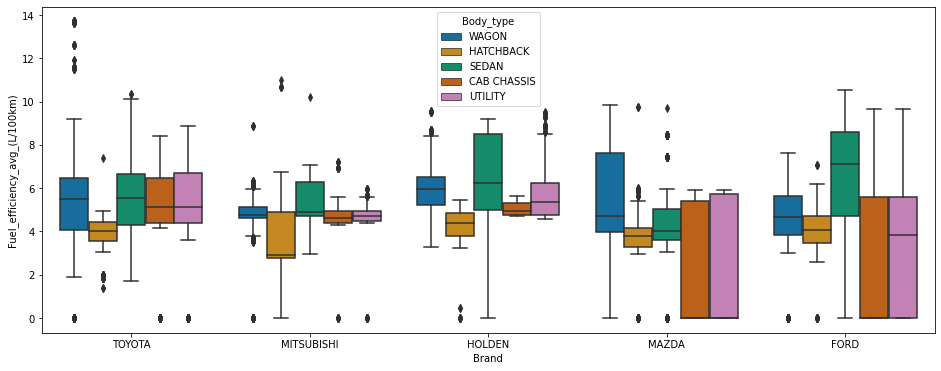

In [145]:
plt.figure(figsize=(16, 6))
sns.boxplot(y='Fuel_efficiency_avg_(L/100km)', x='Brand', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Body_type')

<AxesSubplot:xlabel='Brand', ylabel='2021_sale_price_wholesale_average'>

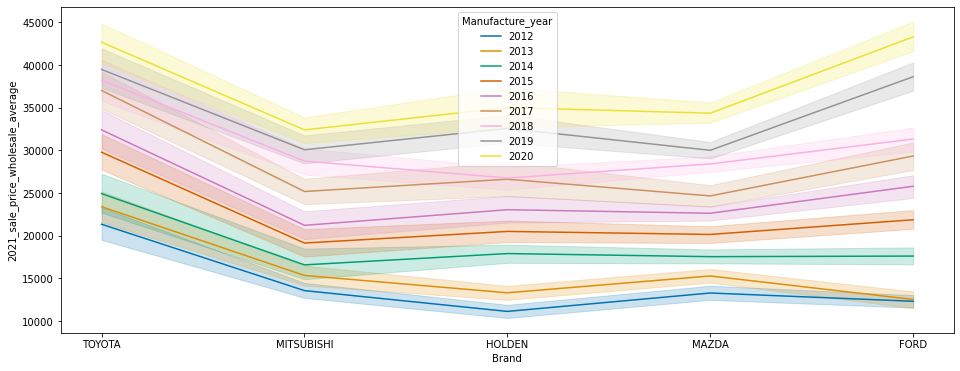

In [143]:
plt.figure(figsize=(16, 6))
sns.lineplot(y='2021_sale_price_wholesale_average', x='Brand', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Manufacture_year')

<AxesSubplot:xlabel='Brand', ylabel='2021_sale_price_wholesale_average'>

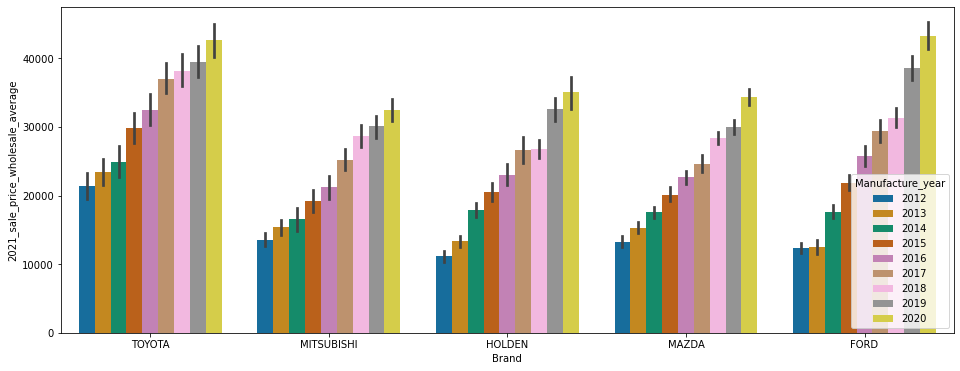

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(y='2021_sale_price_wholesale_average', x='Brand', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Manufacture_year')

             

<AxesSubplot:xlabel='Brand', ylabel='2021_sale_price_wholesale_average'>

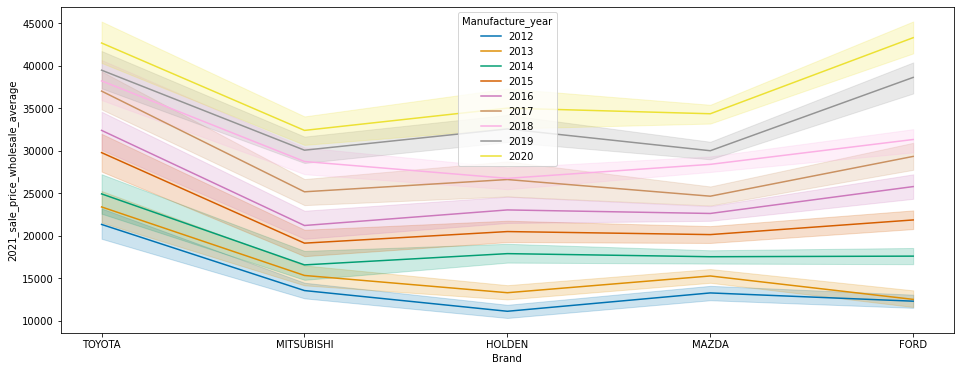

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(y='2021_sale_price_wholesale_average', x='Brand', 
                 data=Top_five_makes, 
                 palette="colorblind",
                 hue='Manufacture_year')

In [209]:
# create def for boxplots

def boxplt(body):
    plt.figure(figsize=(16, 6))
    filtered_data= Top_five_makes[(Top_five_makes.Body_type == body)]
    filtered_data.sort_values('Brand', ascending=True, inplace=True)
    sns.boxplot(y='2021_sale_price_wholesale_average', x='Brand', 
                 data=filtered_data, 
                 palette="colorblind",
                 hue='Manufacture_year')

<ipython-input-209-f168a7f6632c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values('Brand', ascending=True, inplace=True)


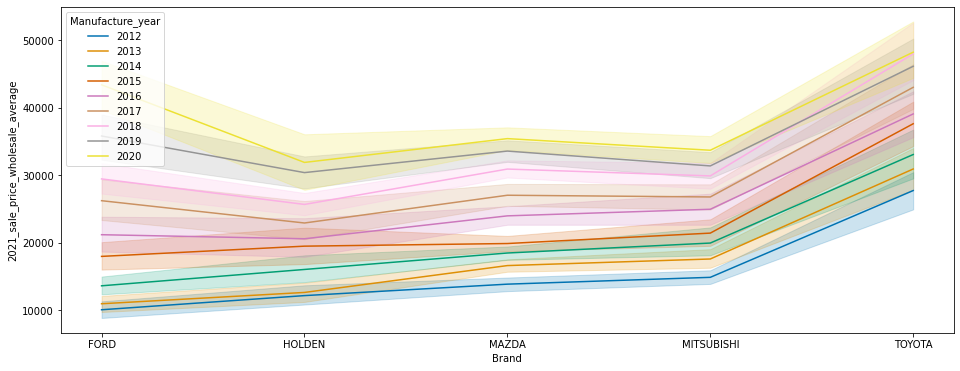

In [210]:
boxplt(body="WAGON")


<ipython-input-209-f168a7f6632c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values('Brand', ascending=True, inplace=True)


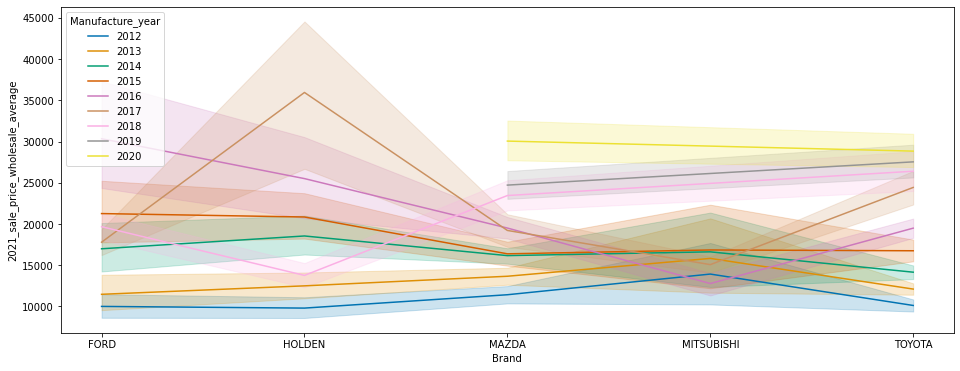

In [211]:
boxplt(body="SEDAN")


<ipython-input-18-41b3171669dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values('Brand', ascending=True, inplace=True)


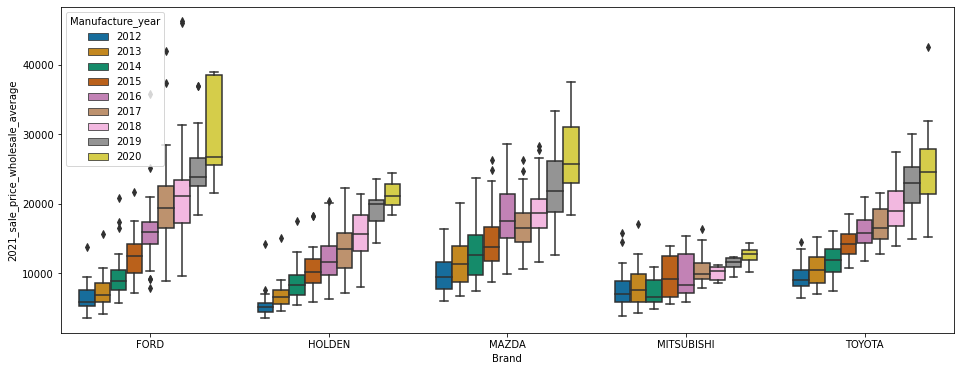

In [21]:
boxplt(body="HATCHBACK")


<ipython-input-18-41b3171669dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values('Brand', ascending=True, inplace=True)


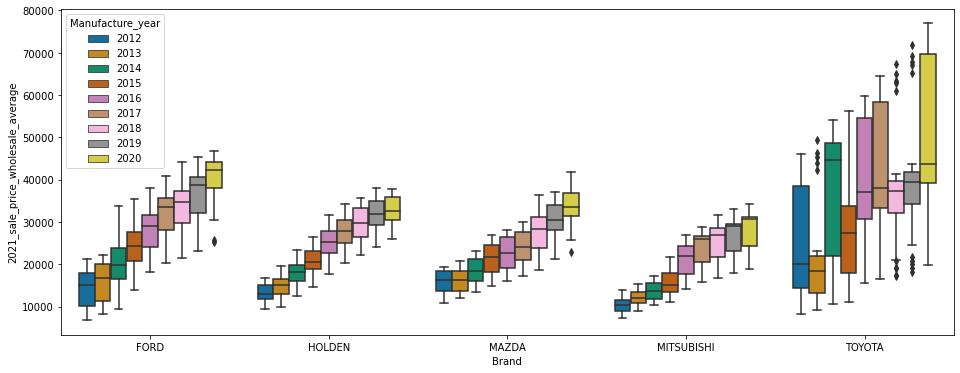

In [22]:
boxplt(body="CAB CHASSIS")


<ipython-input-18-41b3171669dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values('Brand', ascending=True, inplace=True)


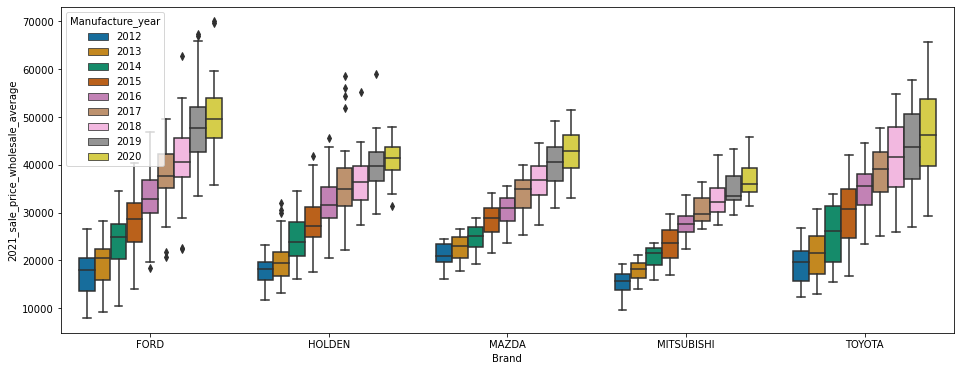

In [23]:
boxplt(body="UTILITY")

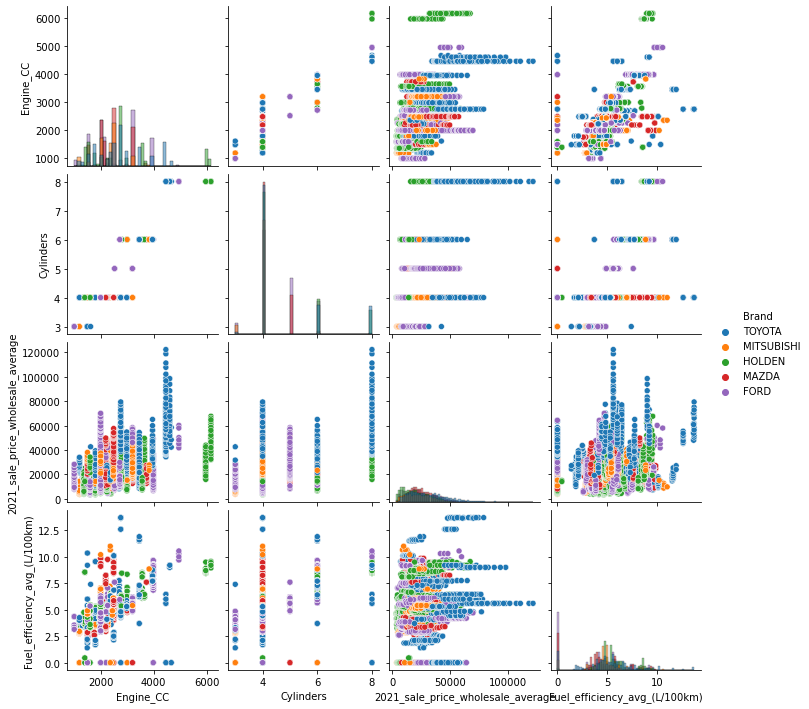

In [24]:
sns.pairplot(Top_five_makes[[   "Engine_CC", 
                                "Cylinders",
                                "2021_sale_price_wholesale_average", 
                                "Fuel_efficiency_avg_(L/100km)",
                                'Brand']], hue="Brand", diag_kind="hist")

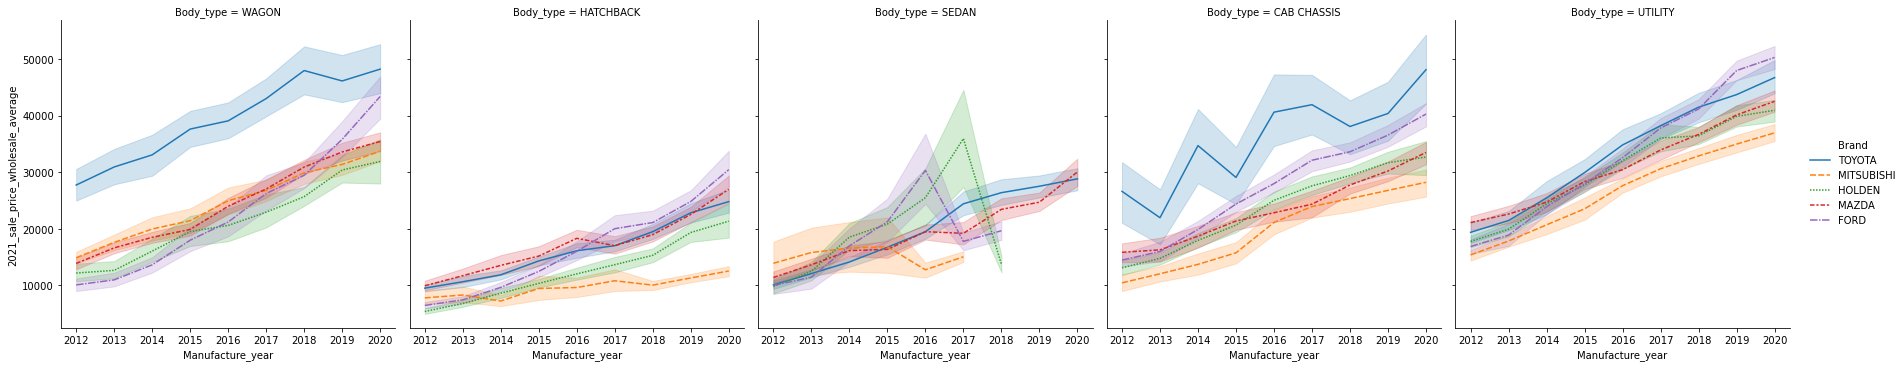

In [25]:
sns.relplot(
    data=Top_five_makes, x="Manufacture_year", y="2021_sale_price_wholesale_average",
    col="Body_type", hue="Brand", style="Brand",
    kind="line"
)

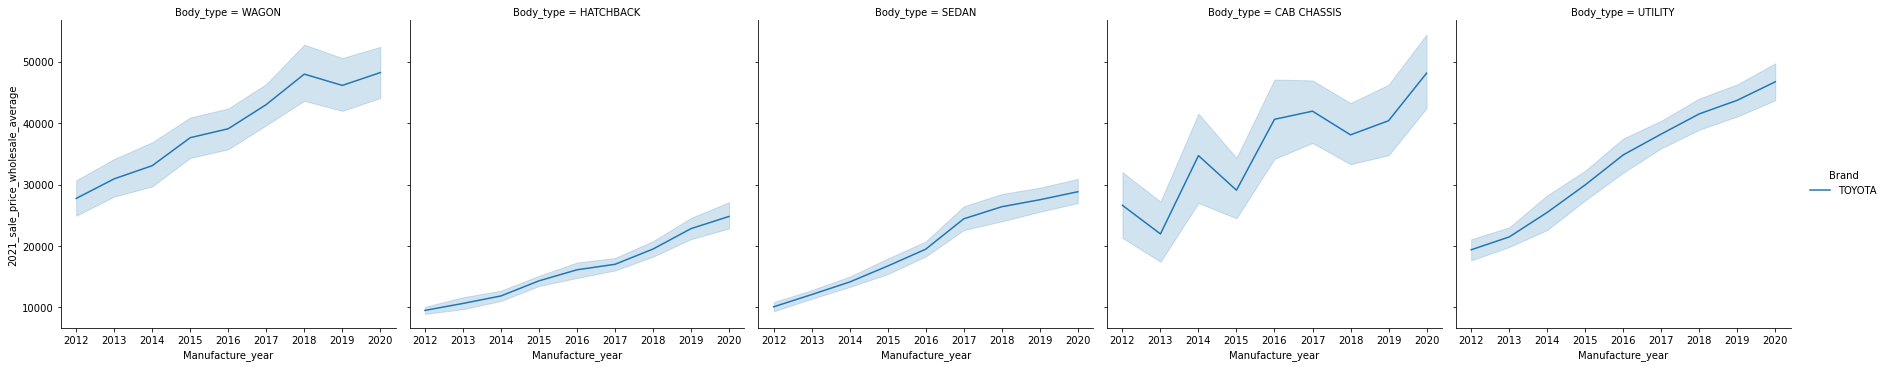

In [26]:
filtered_data= Top_five_makes[(Top_five_makes.Brand == "TOYOTA")]

sns.relplot(
    data=filtered_data, x="Manufacture_year", y="2021_sale_price_wholesale_average",
    col="Body_type", hue="Brand", style="Brand",
    kind="line"
)

In [27]:
# Create new df with distinct countries

countries = Top_five_makes["Country_of_origin"].unique()
countries_df = pd.DataFrame(Top_five_makes["Country_of_origin"].unique())

countries_df['Latitude'] = ""
countries_df['Longitude'] = ""
countries_df= countries_df.rename(columns={0: "Country_of_origin"})

countries_df

,Country_of_origin,Latitude,Longitude
0,JAPAN,,
1,THAILAND,,
2,SOUTH KOREA,,
3,AUSTRALIA,,
4,INDIA,,
5,POLAND,,
6,GERMANY,,
7,UNITED KINGDOM,,
8,SPAIN,,
9,MEXICO,,


In [28]:
target_url = f"https://maps.googleapis.com/maps/api/geocode/json?"

params = {"key": g_key}

# use iterrows to iterate through pandas dataframe
for index, row in countries_df.iterrows():

    country_type = row['Country_of_origin']

    # add keyword to params dict
    params['address'] = country_type

    # assemble url and make API request
    # print(f"Retrieving Results for Index {index}: {cities_type}.")
    response = requests.get(target_url, params=params).json()
    # print(json.dumps(response, indent=4, sort_keys=True))

    # extract results
    results = response['results']
 
    try:
        countries_df.loc[index, 'Latitude'] = response["results"][0]["geometry"]["location"]["lat"]
        countries_df.loc[index, 'Longitude'] = response["results"][0]["geometry"]["location"]["lng"]

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
countries_df

,Country_of_origin,Latitude,Longitude
0,JAPAN,36.204824,138.252924
1,THAILAND,15.870032,100.992541
2,SOUTH KOREA,35.907757,127.766922
3,AUSTRALIA,-25.274398,133.775136
4,INDIA,20.593684,78.96288
5,POLAND,51.919438,19.145136
6,GERMANY,51.165691,10.451526
7,UNITED KINGDOM,55.378051,-3.435973
8,SPAIN,40.463667,-3.74922
9,MEXICO,23.634501,-102.552784


In [29]:
# merge data
Top_five_makes_countries= Top_five_makes[(Top_five_makes.Brand == "FORD")].merge(countries_df, how='left', on='Country_of_origin')[['Brand','Latitude','Longitude']]
Top_five_makes_countries["Volume"]= 1

# groupby
country_grouped=Top_five_makes_countries.groupby(['Brand','Latitude','Longitude'])["Volume"].sum()
country_grouped_df = pd.DataFrame(country_grouped).reset_index()
country_grouped_df


,Brand,Latitude,Longitude,Volume
0,FORD,-30.559482,22.937506,6
1,FORD,-25.274398,133.775136,302
2,FORD,15.870032,100.992541,944
3,FORD,20.593684,78.962880,52
4,FORD,23.697810,120.960515,1
5,FORD,38.963745,35.243322,37
6,FORD,40.463667,-3.749220,237
7,FORD,45.943161,24.966760,6
8,FORD,50.503887,4.469936,30
9,FORD,51.165691,10.451526,89


In [30]:
# Fill NaN values and convert to float
Volume = country_grouped_df["Volume"].astype(float)

# set weight and locations
maxVolume = Volume.max()
coordinates = country_grouped_df[['Latitude', 'Longitude']]

In [31]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

# Create heat layer
heat_layer = gmaps.heatmap_layer(   coordinates, 
                                    weights=Volume, 
                                    dissipating=False, 
                                    max_intensity=maxVolume,
                                    point_radius=3)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…